**1. Read the dataset to the python environment.**

**EXPLORATORY DATA ANALYSIS**

In [254]:
#Importing neccessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
customer_data=pd.read_csv("/content/Wholesale customers data.csv")
customer_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [256]:
#shpae of the dataset
customer_data.shape

(440, 8)

In [257]:
#general information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [258]:
#statistical description about the dataset
customer_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**HANDLING MISSING VALUES AND OUTLIER TREATMENT:**

In [259]:
#checking missing values
customer_data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


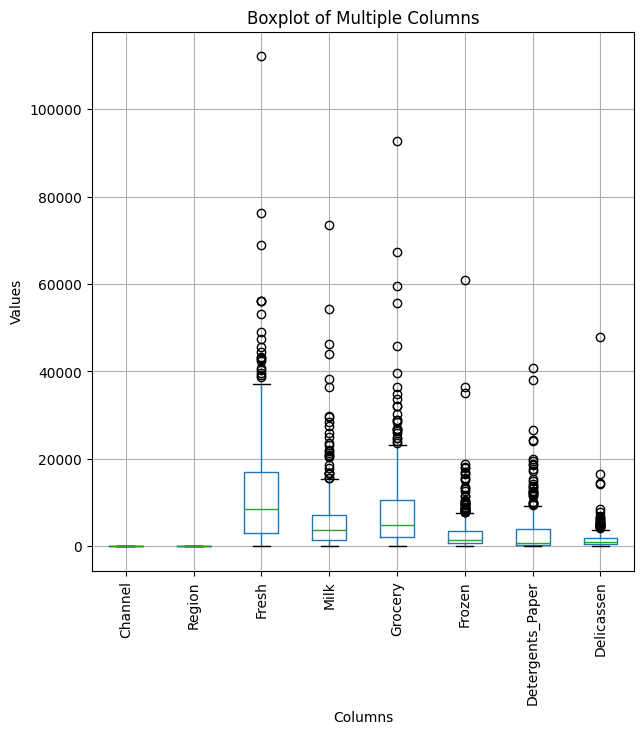

In [260]:
# Create boxplot to check outliers are present in the dataset
#create boxplot
plt.figure(figsize=(7, 7))
customer_data.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Fresh')

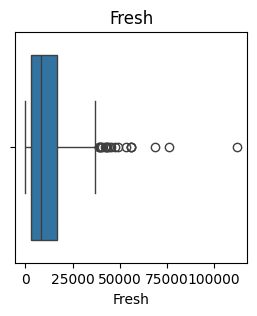

In [261]:
#   Boxplot of the 'Fresh' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=customer_data['Fresh'],data=customer_data)
plt.title('Fresh')

Text(0.5, 1.0, 'Milk')

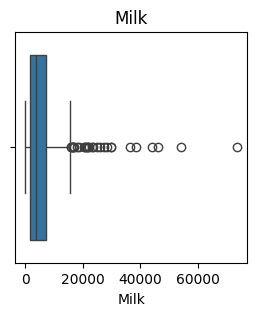

In [262]:
#   Boxplot of the 'Milk' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=customer_data['Milk'],data=customer_data)
plt.title('Milk')

Text(0.5, 1.0, 'Grocery')

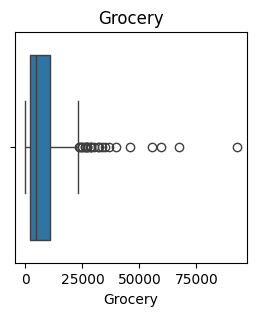

In [263]:
#   Boxplot of the 'Grocery' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=customer_data['Grocery'],data=customer_data)
plt.title('Grocery')

Text(0.5, 1.0, 'Frozen')

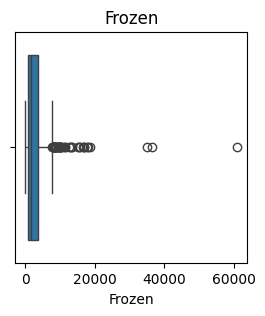

In [264]:
#   Boxplot of the 'Frozen' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=customer_data['Frozen'],data=customer_data)
plt.title('Frozen')

Text(0.5, 1.0, 'Detergents_Paper')

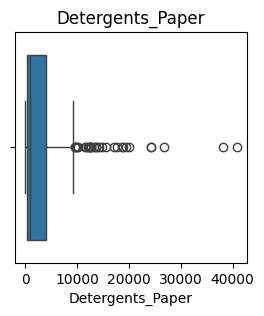

In [265]:
#   Boxplot of the 'Detergents_Paper' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=customer_data['Detergents_Paper'],data=customer_data)
plt.title('Detergents_Paper')

Text(0.5, 1.0, 'Delicassen')

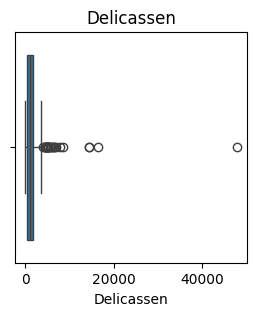

In [266]:
#   Boxplot of the 'Delicassen' before outlier treatment.
plt.figure(figsize=(3,3))
sns.boxplot(x=customer_data['Delicassen'],data=customer_data)
plt.title('Delicassen')

In [267]:
# Columns to apply the IQR method to
numeric_columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

# Applying the IQR method to each specified column
for column in numeric_columns:
    Q1 = customer_data[column].quantile(0.25)
    Q3 = customer_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    customer_data[column] = np.where(customer_data[column] < lower_bound, lower_bound, customer_data[column])
    customer_data[column] = np.where(customer_data[column] > upper_bound, upper_bound, customer_data[column])

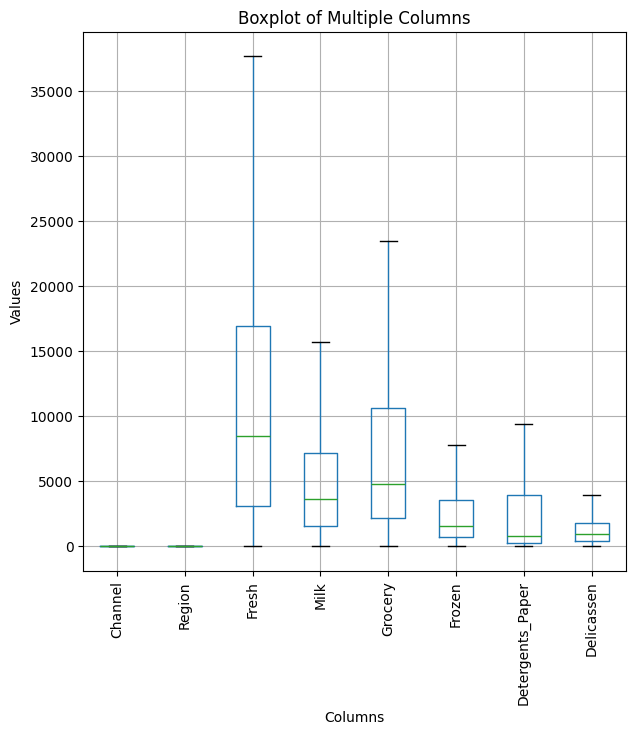

In [268]:
# Create boxplot to after outlier treatment
#create boxplot
plt.figure(figsize=(7, 7))
customer_data.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

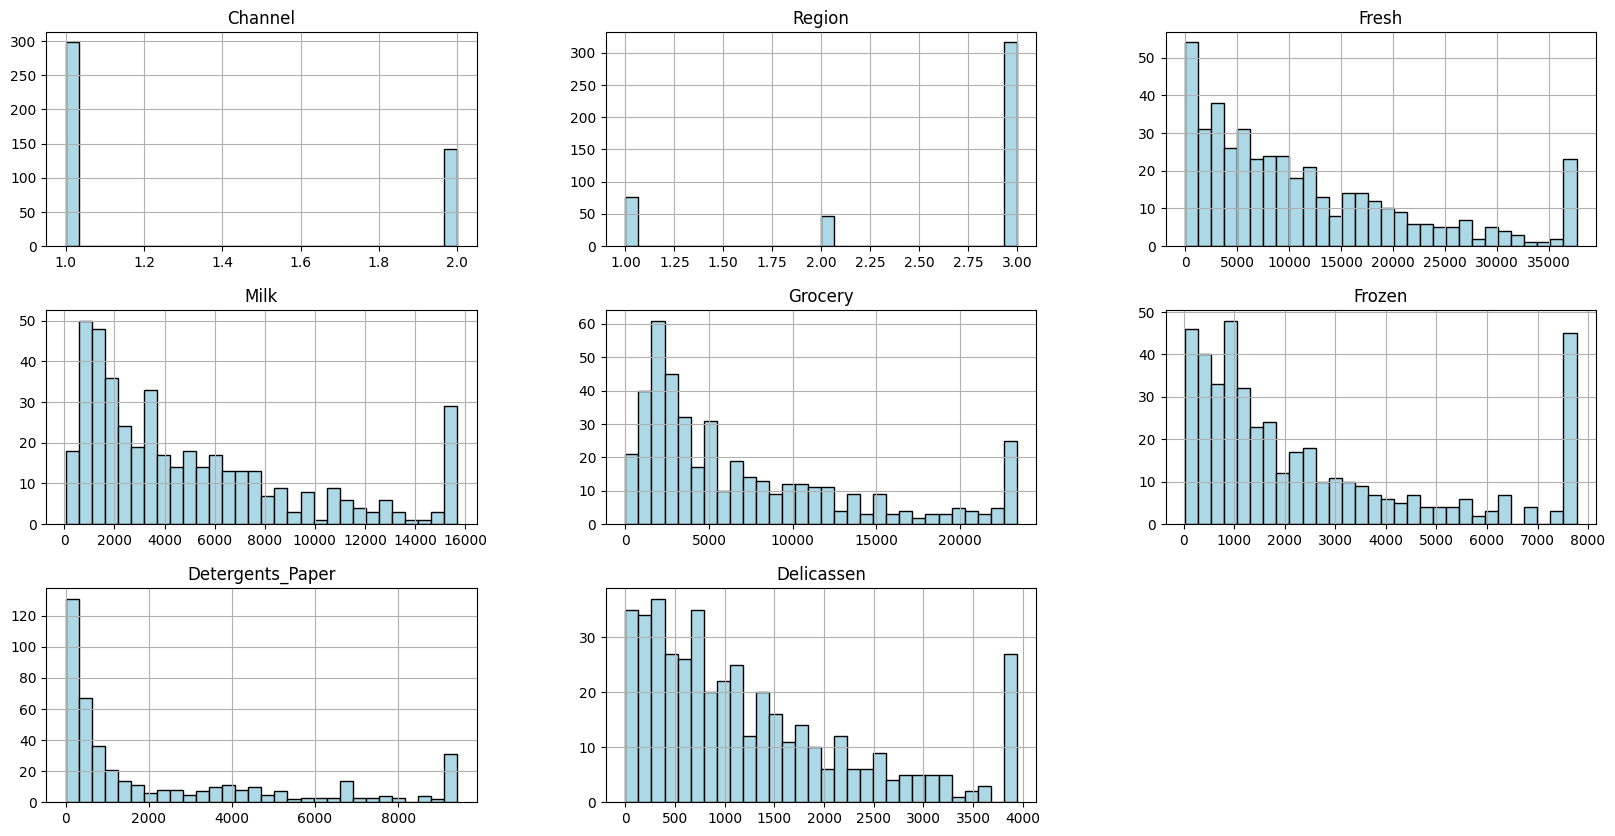

In [269]:
#ploting histograms of all numerical column
customer_data.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

In [270]:
#Correaltion marix
correlation_matrix =customer_data.corr()
correlation_matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.171717,0.598616,0.719867,-0.254707,0.790080,0.166639
Region,0.062028,1.000000,0.056523,0.005734,0.005301,-0.050604,0.004717,0.016801
Fresh,-0.171717,0.056523,1.000000,-0.037991,-0.098357,0.355487,-0.226033,0.259404
Milk,0.598616,0.005734,-0.037991,1.000000,0.781205,-0.037049,0.691217,0.372097
Grocery,0.719867,0.005301,-0.098357,0.781205,1.000000,-0.137456,0.877444,0.290121
Frozen,-0.254707,-0.050604,0.355487,-0.037049,-0.137456,1.000000,-0.239435,0.237178
Detergents_Paper,0.790080,0.004717,-0.226033,0.691217,0.877444,-0.239435,1.000000,0.161233
Delicassen,0.166639,0.016801,0.259404,0.372097,0.290121,0.237178,0.161233,1.000000


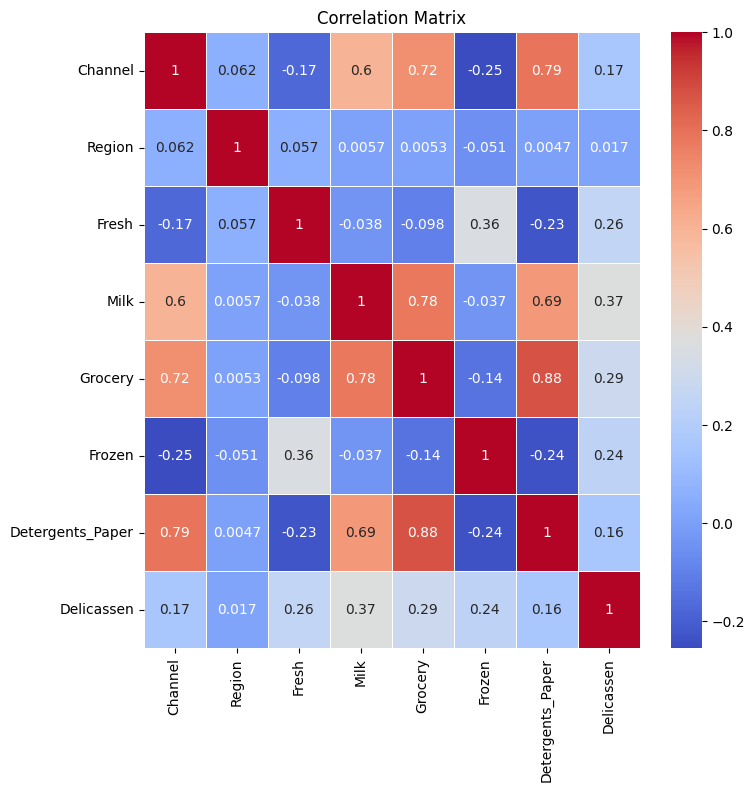

In [271]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Figure size 700x700 with 0 Axes>

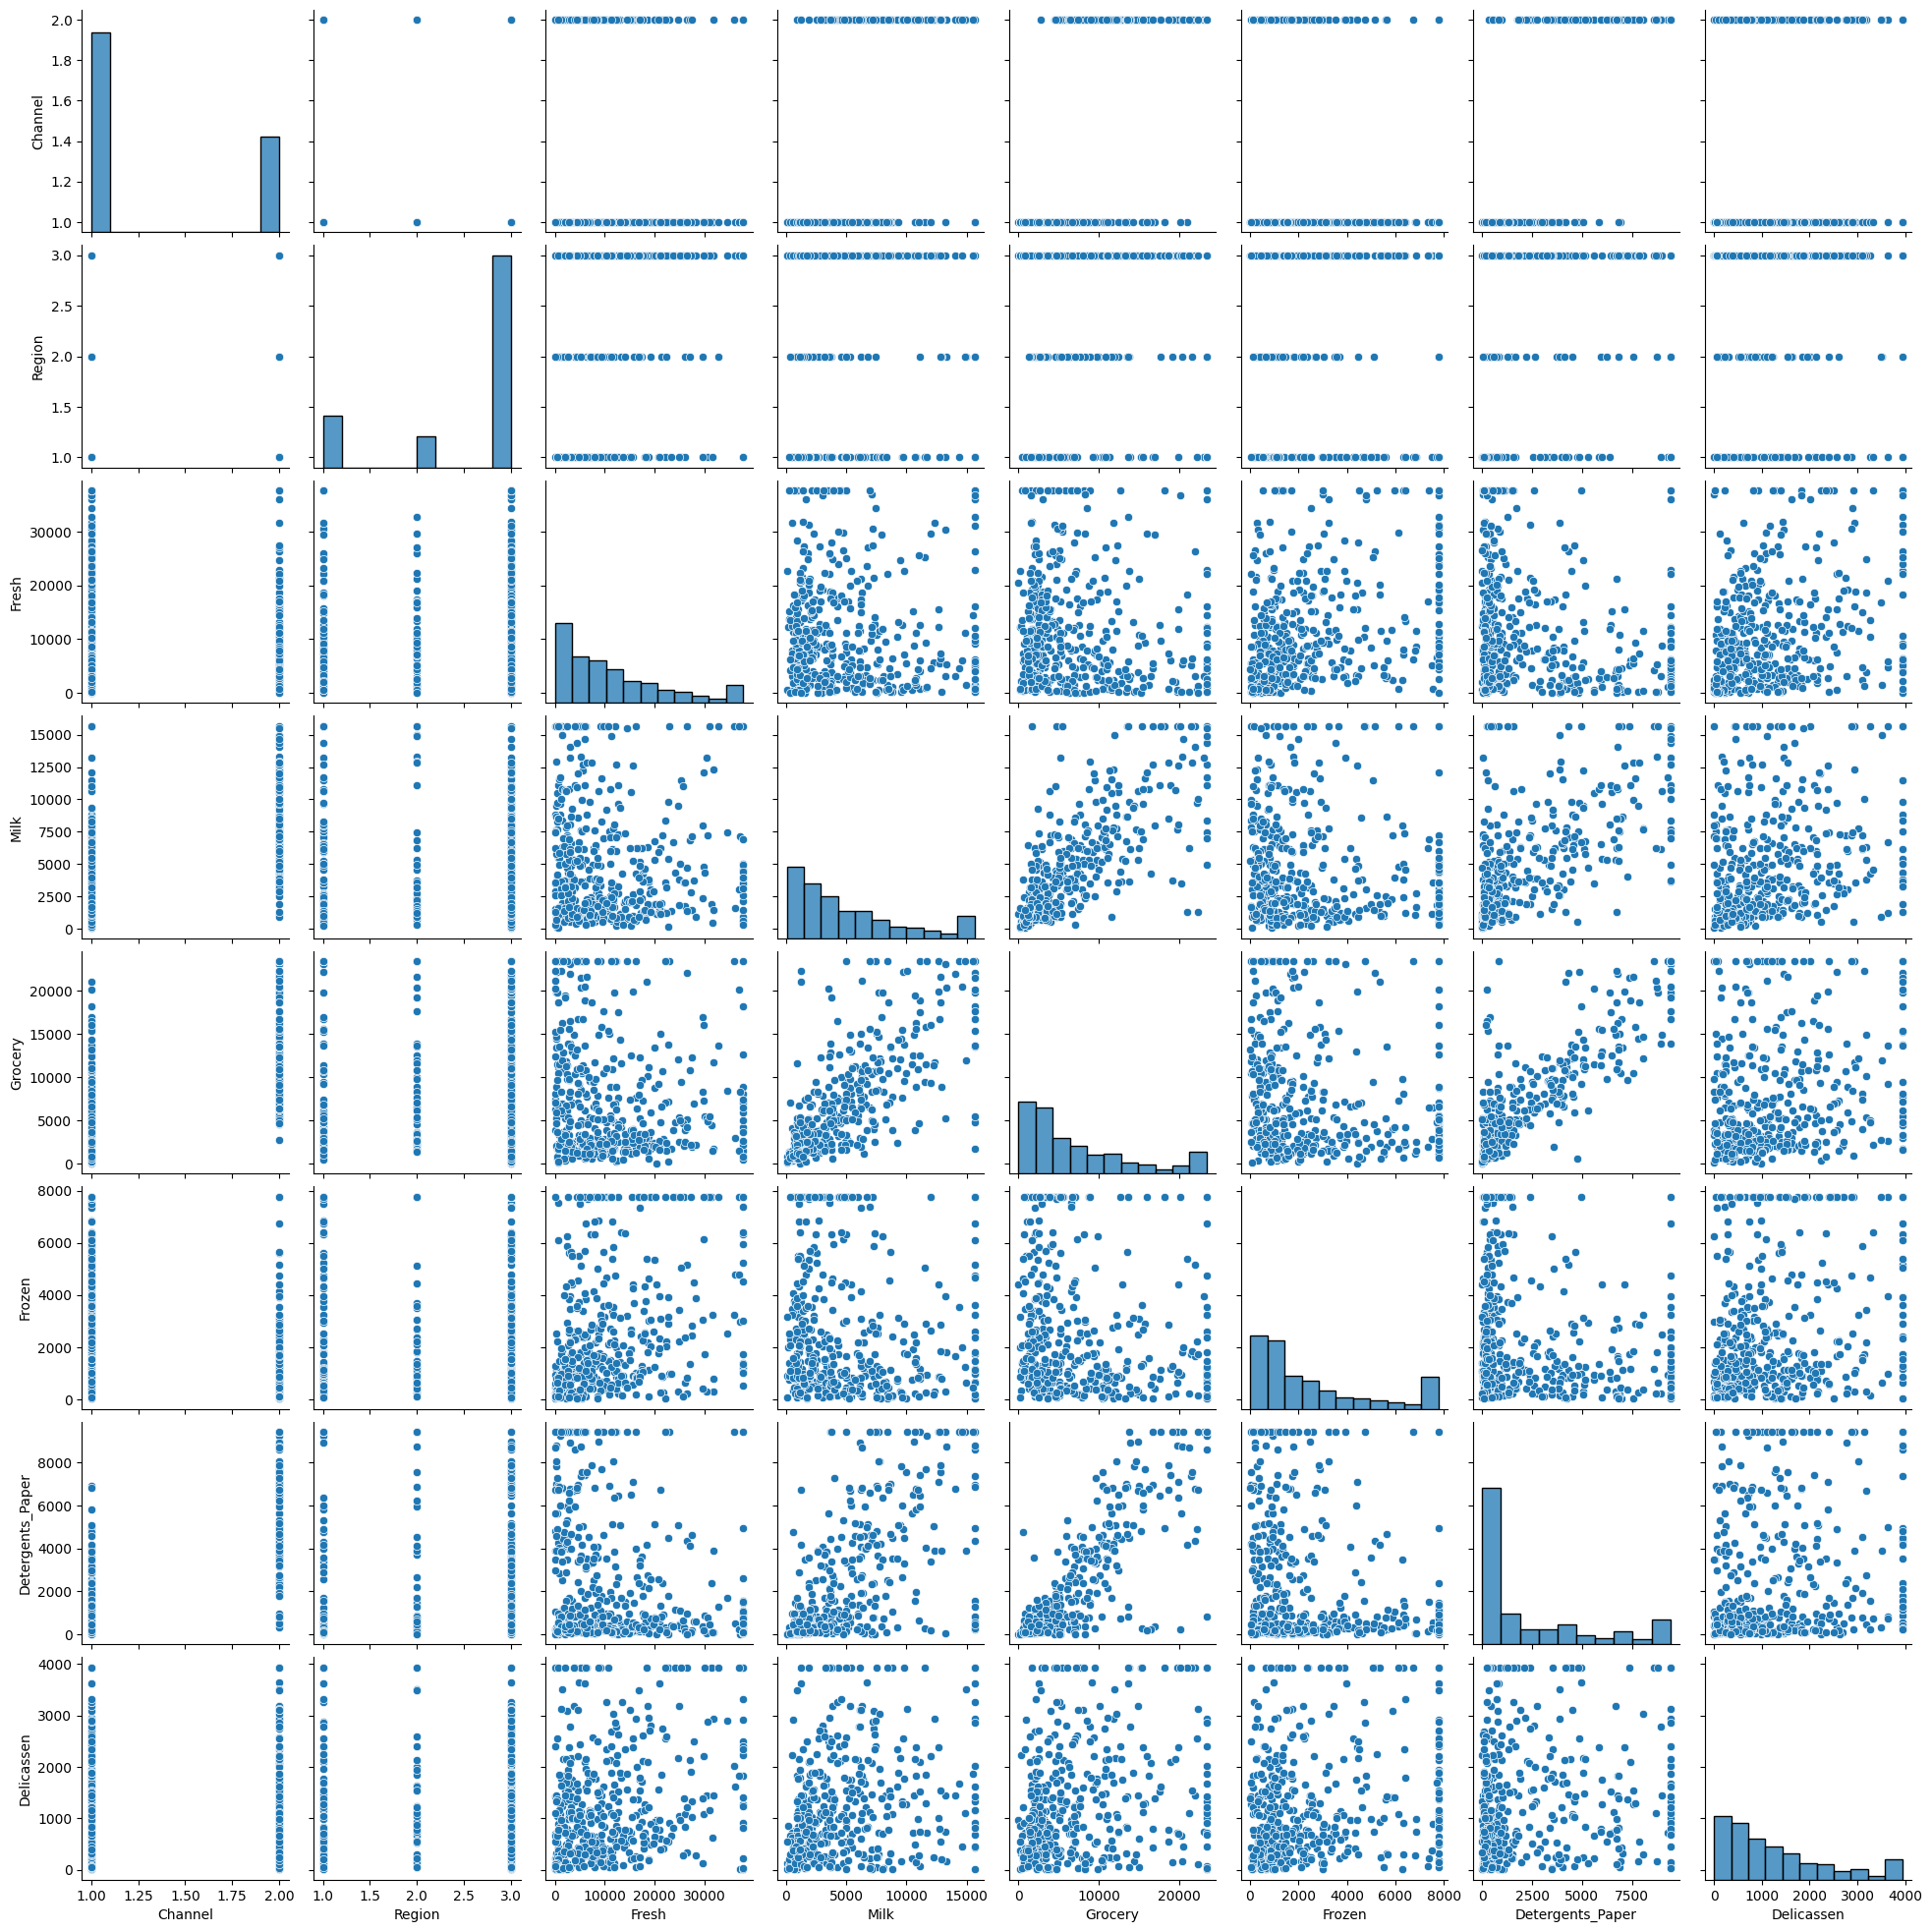

In [272]:
# Data Visualization (Scatter Plots)
plt.figure(figsize=(7, 7))
sns.pairplot(customer_data)
plt.show()

**FEATURE REDUCTION:**

In [273]:
#display minimum corr_values.
min_corr=correlation_matrix['Delicassen'][:-1].min()
min_corr

0.016800696574693574

In [274]:
#display minimum corr_values as list
correlation_matrix[correlation_matrix['Delicassen']==min_corr].index.to_list()

['Region']

In [275]:
#so remove 'Region' column.Because minimum correlation value.
customer_data.drop(['Region'], axis=1, inplace=True)
customer_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,2,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,1,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,2,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


**SPLITTING DATA**

In [276]:
# Importing libraries for Train-test split
from sklearn.model_selection import train_test_split

In [277]:
# Define your features (X) and target (y)
X = customer_data.drop(columns=['Channel'])
y = customer_data['Channel']

In [278]:
 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**FEATURE SCALING TO NORMALIZE DATA**

**Implementing MinMax scaling**

In [279]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [280]:
# Apply MinMaxScaler
min_scaler = MinMaxScaler()
X_train_scaled = min_scaler.fit_transform(X_train)
X_test_scaled = min_scaler.transform(X_test)

In [281]:
# Convert scaled data back to DataFrame with the same feature columns
X_train_scaled_customer_data = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_customer_data= pd.DataFrame(X_test_scaled, columns=X.columns)

In [282]:
print(X_train_scaled_customer_data)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.015117  0.620080  0.947056  0.283455          0.518112    0.650530
1    0.565094  0.122140  0.273027  0.114105          0.085803    0.470364
2    0.069315  0.271586  0.125691  0.266288          0.086759    0.249539
3    0.315199  0.206565  0.198173  0.148827          0.407141    0.029731
4    0.140277  0.848361  0.870175  0.230275          0.929077    0.042945
..        ...       ...       ...       ...               ...         ...
347  0.038550  0.399958  0.452141  0.013940          0.724975    0.464519
348  0.125320  0.059110  0.032641  0.706702          0.020601    0.013468
349  0.090994  0.145720  0.078045  0.169867          0.125413    0.168223
350  0.789059  0.767085  0.681661  1.000000          0.019008    0.559304
351  0.077817  0.407797  0.321621  0.327342          0.485299    0.351439

[352 rows x 6 columns]


**Implementing StandardScaler**

In [283]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_stand_scaled = scaler.fit_transform(X_train)
X_test_stand_scaled = scaler.transform(X_test)

In [284]:
## Convert scaled data back to DataFrame with the same feature columns
X_train_stand_scaled_customer_data = pd.DataFrame(X_train_stand_scaled, columns=X.columns)
X_test_stand_scaled_customer_data= pd.DataFrame(X_test_stand_scaled, columns=X.columns)

In [285]:
print(X_train_stand_scaled_customer_data)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   -1.059466  1.073416  2.244324 -0.093480          0.809556    1.189490
1    1.019698 -0.702326 -0.114790 -0.659982         -0.552415    0.532788
2   -0.854573 -0.169374 -0.630468 -0.150908         -0.549404   -0.272112
3    0.074980 -0.401252 -0.376779 -0.543832          0.459947   -1.073307
4   -0.586303  1.887507  1.975241 -0.271376          2.104281   -1.025142
..        ...       ...       ...       ...               ...         ...
347 -0.970880  0.288423  0.512114 -0.995047          1.461267    0.511485
348 -0.642850 -0.927100 -0.956144  1.322341         -0.757831   -1.132586
349 -0.772616 -0.618236 -0.797230 -0.473451         -0.427626   -0.568508
350  1.866389  1.597660  1.315438  2.303464         -0.762849    0.856971
351 -0.822433  0.316377  0.055292  0.053326          0.706179    0.099309

[352 rows x 6 columns]


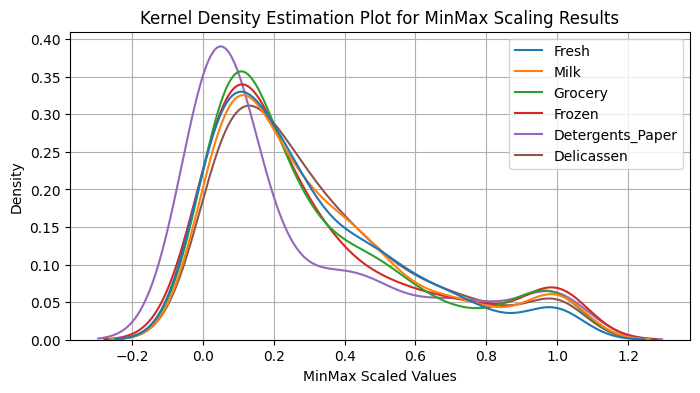

In [286]:
#Density plot showing the distribution of MinMax Scaling Results.
plt.figure(figsize=(8, 4))
sns.kdeplot(data=X_train_scaled_customer_data)
plt.title('Kernel Density Estimation Plot for MinMax Scaling Results')
plt.xlabel('MinMax Scaled Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

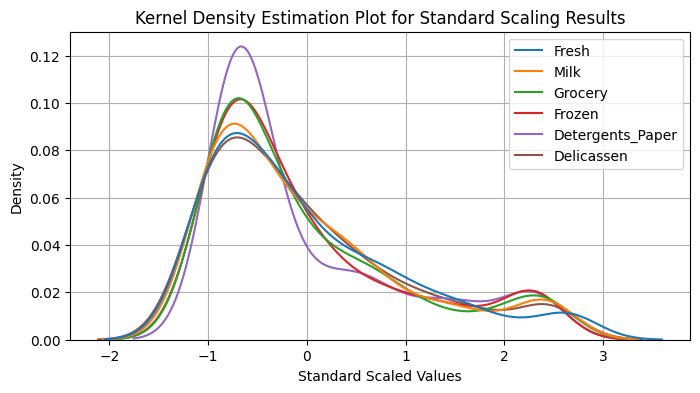

In [287]:
#Density plot showing the distribution of Standard Scaling Results.
plt.figure(figsize=(8, 4))
sns.kdeplot(data=X_train_stand_scaled_customer_data)
plt.title('Kernel Density Estimation Plot for Standard Scaling Results')
plt.xlabel('Standard Scaled Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Moving forward I will be using MinMax scaler since the MinMax scaler scales continuous features to a specific range. This scaler is good choice since it preserve the relationships between the features and have them all within a common range

2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.
4. Perform DBSCAN Clustering
5. Also perform PCA for Dimensionality reduction.







**PCA**

In [288]:
from sklearn.decomposition import PCA
# there are 7 original features
pca=PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled_customer_data)
X_test_pca = pca.transform(X_test_scaled_customer_data)

In [289]:
#Convert PCA output to DataFrames
pca_columns = [f'PC{i+1}' for i in range(6)]
X_train_pca_customer_data = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_customer_data = pd.DataFrame(X_test_pca, columns=pca_columns)

In [290]:
#Check how much variance is explained by the 6 components
explained_variance=pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Retained:", explained_variance.sum())

Explained Variance Ratio: [0.4752804  0.25753284 0.11350107 0.08866411 0.04703035 0.01799123]
Total Variance Retained: 0.9999999999999999


Text(0, 0.5, 'Explained Variance')

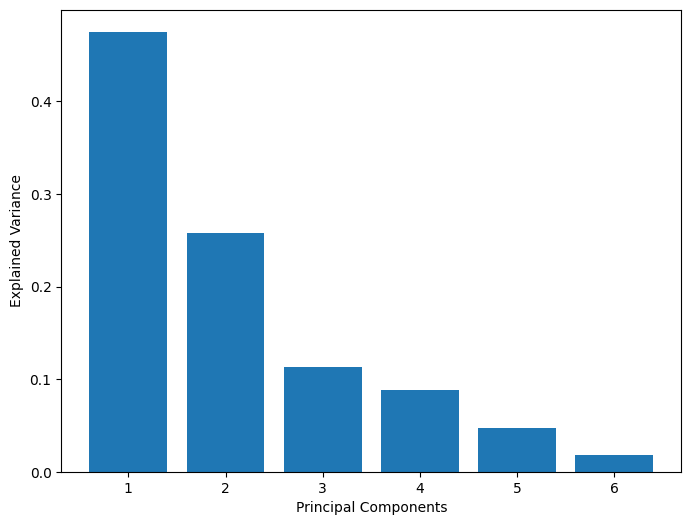

In [291]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")

**CLUSTERING MODELS**

**1.K-MEANS CLUSTERING:**

Elbow method for KMeans Clustering:

In [292]:
from sklearn.cluster import KMeans

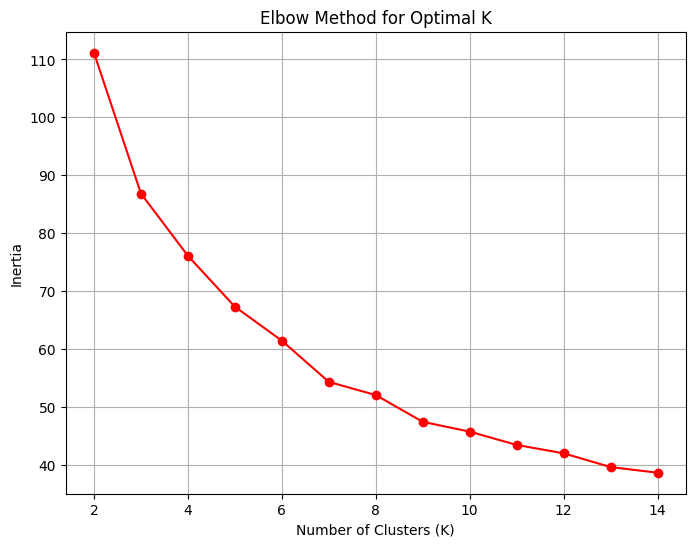

In [293]:
# Define the range of K values to test
K_values = range(2,15)
# Initialize an empty list to store the inertia values
inertia = []

# Iterate over the K values and fit KMeans for each K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca_customer_data)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow method to identify the optimal K
plt.figure(figsize=(8, 6))
plt.plot(K_values, inertia, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [294]:
# Identify the optimal K using the "elbow" method
diff = np.diff(inertia)
k_optimal = K_values[np.argmin(diff) + 1]

print(f"The optimal number of clusters (K) is: {k_optimal}")

The optimal number of clusters (K) is: 3


FINDING CLUSTERS USING SILHOUETTE SCORE

In [295]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
K = range(2, 16)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_pca_customer_data)
    score = silhouette_score(X_train_pca_customer_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Find the K with the highest silhouette score
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on silhouette score: {best_k}")

K=2, Silhouette Score=0.3810
K=3, Silhouette Score=0.3304
K=4, Silhouette Score=0.3103
K=5, Silhouette Score=0.2954
K=6, Silhouette Score=0.2909
K=7, Silhouette Score=0.2838
K=8, Silhouette Score=0.2603
K=9, Silhouette Score=0.2495
K=10, Silhouette Score=0.2507
K=11, Silhouette Score=0.2386
K=12, Silhouette Score=0.2435
K=13, Silhouette Score=0.2182
K=14, Silhouette Score=0.2065
K=15, Silhouette Score=0.2165

Optimal number of clusters based on silhouette score: 2


In [296]:
#Creating k-means clustering model
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X_train_pca_customer_data)

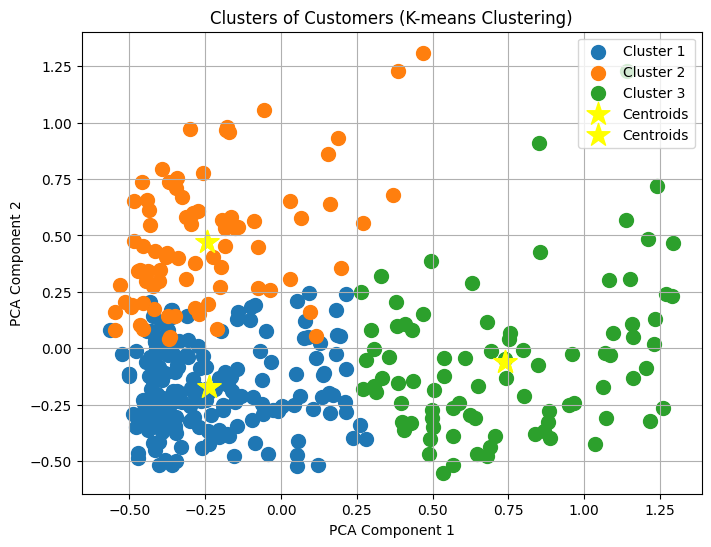

In [297]:
# Assuming k_optimal is 3.
plt.figure(figsize=(8,6))
for i in range(k_optimal):
    m= (y_kmeans == i)
    plt.scatter(X_train_pca_customer_data.iloc[m, 0], X_train_pca_customer_data.iloc[m, 1], s=100, label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Clusters of Customers (K-means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [298]:
#calculating silhouette_score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_pca_customer_data, y_kmeans)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.32


In [299]:
#creating classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_kmeans, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.31      0.47       233
           2       0.95      0.69      0.80       119

    accuracy                           0.44       352
   macro avg       0.63      0.33      0.42       352
weighted avg       0.93      0.44      0.58       352



**Here accracy is 0.44.To improve accuracy, we can use optimal label mapping, which results in better performance**

In [300]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment

# Compute confusion matrix
conf_mat = confusion_matrix(y_train, y_kmeans)

#Use Hungarian algorithm for optimal label mapping
row_ind, col_ind = linear_sum_assignment(-conf_mat)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}

# Apply mapping to predicted labels
y_pred_mapped_kmeans = np.array([label_mapping[label] for label in y_kmeans])

#Evaluate with classification report
print(classification_report(y_train, y_pred_mapped_kmeans,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.67      0.74       233
           2       0.95      0.69      0.80       119

    accuracy                           0.68       352
   macro avg       0.60      0.45      0.51       352
weighted avg       0.87      0.68      0.76       352



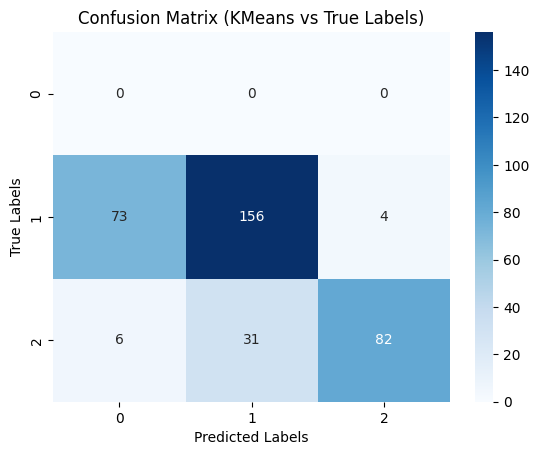

In [301]:
#Confusion Matrix  for KMeans vs True Labels
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_mapped_kmeans)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KMeans vs True Labels)')
plt.show()


**2.AGGLOMERATIVE CLUSTERING**

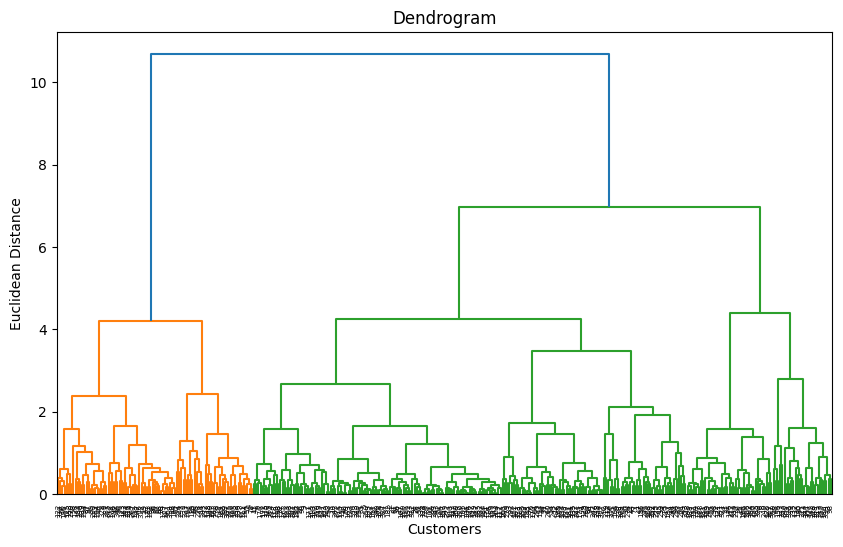

In [302]:
#Optimum number of clusters needed using dendrogram method
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 6))
dend = sch.dendrogram(sch.linkage(X_train_pca_customer_data, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [303]:
#creating Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=k_optimal,linkage='ward')
y_hc = hc.fit_predict(X_train_pca_customer_data)

In [304]:
y_hc

array([1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1,
       0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1,
       0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0,

In [305]:
#display unique y_hc values
import numpy as np
print(np.unique(y_hc))

[0 1 2]


In [306]:
#for setting centroids
unique_labels = np.unique(y_hc)
centroids = np.array([X_train_pca_customer_data[y_hc == i].mean(axis=0) for i in unique_labels])

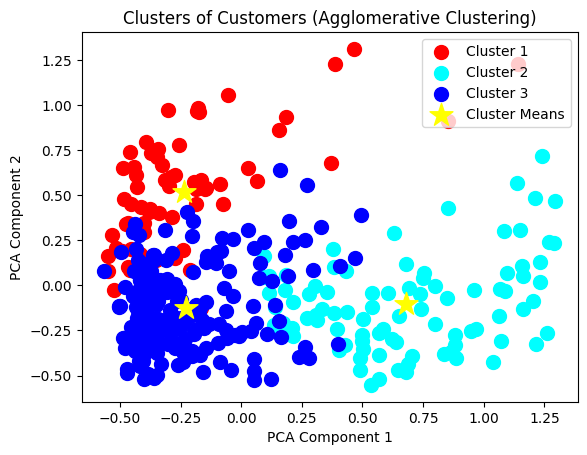

In [307]:
#plot clusters
colors = ['red', 'cyan', 'blue']
for i, label in enumerate(unique_labels):
    m2 = (y_hc == label)
    plt.scatter(X_train_pca_customer_data.iloc[m2, 0],
                X_train_pca_customer_data.iloc[m2, 1],
                s=100, c=colors[i], label=f'Cluster {label+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Cluster Means')

plt.title('Clusters of Customers (Agglomerative Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.show()

In [308]:
#calculating silhouette_score
score = silhouette_score(X_train_pca_customer_data, y_hc)
print(f"Silhouette Score (Hierarchical Clustering): {score:.4f}")

Silhouette Score (Hierarchical Clustering): 0.3090


In [309]:
#creating classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_hc, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.11      0.04      0.06       233
           2       0.17      0.29      0.22       119

    accuracy                           0.12       352
   macro avg       0.09      0.11      0.09       352
weighted avg       0.13      0.12      0.11       352



**The accuracy is low here(0.12). To improve it, we can use optimal label mapping, which gives better accuracy.**

In [310]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment

# Compute confusion matrix
conf_mat = confusion_matrix(y_train, y_hc)

#Use Hungarian algorithm for optimal label mapping
row_ind, col_ind = linear_sum_assignment(-conf_mat)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}

# Apply mapping to predicted labels
y_pred_mapped_hc = np.array([label_mapping[label] for label in y_hc])

#Evaluate with classification report
print(classification_report(y_train, y_pred_mapped_hc,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.70      0.76       233
           2       0.89      0.66      0.76       119

    accuracy                           0.69       352
   macro avg       0.57      0.45      0.51       352
weighted avg       0.85      0.69      0.76       352



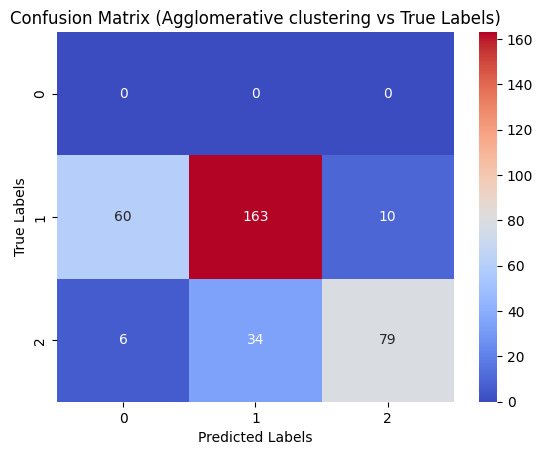

In [311]:
#Confusion Matrix  for Agglomerative clustering vs True Labels
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_mapped_hc)
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Agglomerative clustering vs True Labels)')
plt.show()

**3. DBSCAN**

In [312]:
#creating DBSCAN model
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=3)
y_db=dbscan.fit_predict(X_train_pca_customer_data)

In [313]:
unique_labels = set(y_db)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

<ipython-input-313-ec64fbacd4c0>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


<ipython-input-314-c87081426253>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


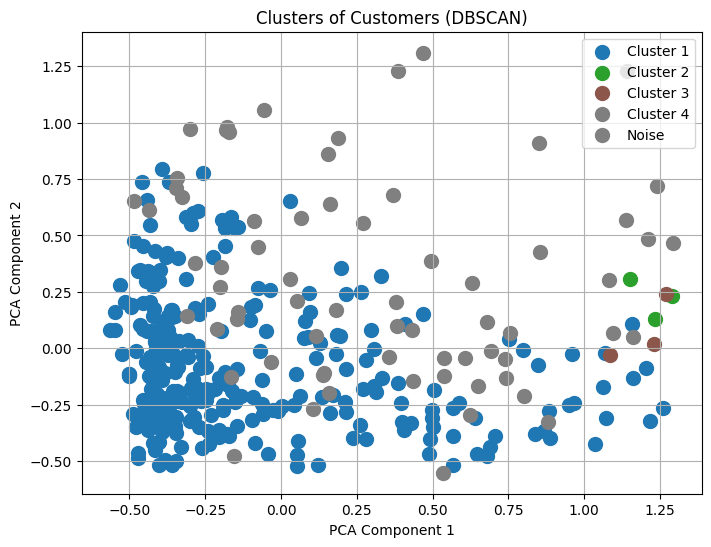

In [314]:
#plot clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    if label == -1:
        color = 'gray'
        label_name = 'Noise'
    else:
        color = colors(label)
        label_name = f'Cluster {label + 1}'
    m3 = (y_db == label)
    plt.scatter(
        X_train_pca_customer_data.loc[m3, X_train_pca_customer_data.columns[0]],
        X_train_pca_customer_data.loc[m3, X_train_pca_customer_data.columns[1]],
        s=100, c=color, label=label_name
    )
plt.title('Clusters of Customers (DBSCAN)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [315]:
#calculating silhouette_score
score = silhouette_score(X_train_pca_customer_data, y_db)
print(f"Silhouette Score (DBSCAN): {score:.4f}")

Silhouette Score (DBSCAN): 0.0820


In [316]:
#creating classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_db, zero_division=0))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00       233
           2       1.00      0.03      0.05       119
           3       0.00      0.00      0.00         0

    accuracy                           0.01       352
   macro avg       0.20      0.01      0.01       352
weighted avg       0.34      0.01      0.02       352



**The accuracy is low here(0.01). To improve it, we can use optimal label mapping, which gives better accuracy**

In [317]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import linear_sum_assignment

# Ignore noise points (-1) when calculating confusion matrix
mask = y_db != -1
conf_mat = confusion_matrix(y_train[mask], y_db[mask])

# Hungarian algorithm for optimal label mapping
row_ind, col_ind = linear_sum_assignment(-conf_mat)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}

# Map predicted labels;
y_pred_mapped_db = np.array([label_mapping[label] if label != -1 else -1 for label in y_db])

# Print classification report excluding noise
print(classification_report(y_train[mask], y_pred_mapped_db[mask], zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.71      0.98      0.82       202
           2       1.00      0.03      0.07        87
           3       0.00      0.00      0.00         0

    accuracy                           0.69       289
   macro avg       0.43      0.25      0.22       289
weighted avg       0.80      0.69      0.59       289



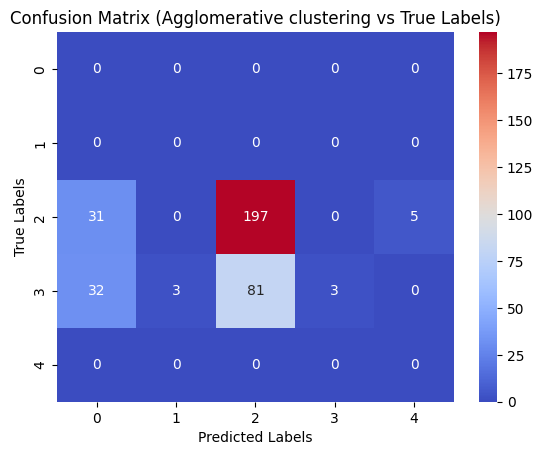

In [318]:
#Confusion Matrix  for DBSCAN vs True Labels
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_mapped_db)
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Agglomerative clustering vs True Labels)')
plt.show()